# Downy Woodpecker - valid concept, historic records
This notebook is a tool for exploring data sets requested from GBIF (and eventually other sources), and mostly for developing criteria for filtering records (filter sets).  When the entire notebook is run, it retrieves records according to the filter sets specified and saves the results (records and some summary tables) in an sqlite database.  Some information is pulled from the parameters.sqlite database that is saved in this repository.

### Set Variables - fill out stuff in this cell.  
Notes:
default_coordUncertainty -- coordinateUncertaintyInMeters is often not provided.  Here is an option to use a default.  If you don't want anything entered, set this equal to False (boolean, not string).

In [1]:
species_id = 'bdowox1'
summary_name = 'dowobig'
gbif_req_id = 'GBIFr26'
gbif_filter_id = 'GBIFf9'
default_coordUncertainty = 1000       # Note above.
workDir = 'T:/Occurrence_Records/'  # Be sure to create folders named "Inputs" and "Outputs" here.
codeDir = 'T:/Code/Wildlife-Wrangler/'
paramdb = 'P:/Proj3/USGap/Vert/DBase/wildlife-wrangler.sqlite'
configDir = 'T:/GAP/Data/'  # Path to folder where saved your wildlifeconfig file.

There is a bug with mpl_toolkits, the following code is a temp fix, hopefully.
https://stackoverflow.com/questions/52911232/basemap-library-using-anaconda-jupyter-notebooks-keyerror-proj-lib/54087410#54087410

In [2]:
import os
os.environ['PROJ_LIB'] = r'c:\Users\nmtarr\AppData\Local\Continuum\miniconda3\envs\wrangler\Library\share'

### Setup - nothing to fill out in this cell

In [3]:
%matplotlib inline
import sqlite3
import pprint
import json
import pandas as pd
import numpy as np
pd.set_option('display.width', 600)
pd.set_option('display.max_colwidth', 30)
pd.set_option('display.max_rows', 150)
from IPython.display import Image
from pygbif import occurrences
import matplotlib.pyplot as plt
import os
from datetime import datetime
t1 = datetime.now()
import sys
sys.path.append(configDir)
import wranglerconfig as config
sys.path.append(codeDir)
import repo_functions as functions
inDir = workDir + 'Inputs/'
outDir = workDir + 'Outputs/'
spdb = outDir + species_id + gbif_req_id + gbif_filter_id + '.sqlite'
username = config.gbif_username
password = config.gbif_password
email = config.gbif_email
print("Notebook run " + str(t1))
print(spdb)
connjup = sqlite3.connect(paramdb)
cursorjup = connjup.cursor()
# Get some variables
years = connjup.execute("""SELECT years_range 
                           FROM gbif_requests WHERE request_id = '{0}'""".format(gbif_req_id)).fetchone()[0]
gap_id = connjup.execute("""SELECT gap_id
                            FROM species_concepts WHERE species_id = '{0}'""".format(species_id)).fetchone()[0]
common_name = connjup.execute("""SELECT common_name
                                 FROM species_concepts WHERE species_id = '{0}'""".format(species_id)).fetchone()[0]

Notebook run 2020-03-25 13:34:27.049689
T:/Occurrence_Records/Outputs/bdowox1GBIFr26GBIFf9.sqlite


# Species Concept
Display information on the species from the parameters.sqlite database.

In [4]:
vals = cursorjup.execute("SELECT * FROM species_concepts WHERE species_id = '{0}';".format(species_id)).fetchall()[0]
cols = [x[1] for x in cursorjup.execute("PRAGMA table_info('species_concepts')").fetchall()]
sp_dict = dict(zip(cols, vals))
sp_df = pd.DataFrame.from_dict(sp_dict, orient='index', columns=['VALUE'])
sp_df.index.name = 'ATTRIBUTE'
print("SPECIES CONCEPT RECORD")
print(sp_df)

SPECIES CONCEPT RECORD
                                                   VALUE
ATTRIBUTE                                               
species_id                                       bdowox1
fws_id                                              None
gap_id                                              None
itis_tsn                                            None
gbif_id                                          9149595
bcb_id                                              None
ebird_id                                            None
common_name                             downy woodpecker
scientific_name                      Dryobates pubescens
start_year                                          2018
split_from                                       bdowox0
end_year                                            None
lumped_into                                         None
geometry                                            None
detection_distance_meters                            200
vetted_h

# Filters
Display the parameters of the request filter set.  These are deployed during the step where records are retrieved from the API.

In [5]:
request_df = pd.read_sql_query(sql="SELECT * FROM gbif_requests WHERE request_id = '{0}'".format(gbif_req_id), con=connjup)
print("THE REQUEST FILTER SET")
print(request_df.loc[0])

THE REQUEST FILTER SET
request_id                            GBIFr26
source                                   GBIF
lat_range                                None
lon_range                                None
years_range                         1990,2015
months_range                             1,12
geoissue                                False
coordinate                               True
country                                    US
geometry                                 None
creator                               N. Tarr
notes           Built for GAP v2 range map...
Name: 0, dtype: object


Display the parameters of the post-request filter set.  These are deployed after the records are retrieved from the API, but before they are stored in the occurrence record sqlite database.

In [6]:
filter_df = pd.read_sql_query(sql="SELECT * FROM gbif_filters WHERE filter_id = '{0}'".format(gbif_filter_id), con=connjup)
print("THE POST REQUEST FILTER SET")
print(filter_df.loc[0])

THE POST REQUEST FILTER SET
filter_id                                            GBIFf9
dataset                                                GBIF
institutions_omit                                      None
collection_codes_omit                                  None
datasets_omit                                          None
has_coordinate_uncertainty                                0
max_coordinate_uncertainty                            10000
bases_omit                                             None
sampling_protocols_omit                                None
issues_omit                                            None
duplicates_OK                                          True
creator                                             N. Tarr
notes                         Used for speed tests.  Let...
Name: 0, dtype: object


## Filter set justification - ENTER your justification for the following settings.

**default_coord_uncertainty:** 

**years_range:**

**months_range:** 

**geoissue:** 

**coordinate:** 

**country:**

**geometry:**

**collection_codes_omit:** 

**institutions_omit:** 

**datasets_omit:**

**has_coordinate_uncertainty:** 

**max_coordinate_uncertainty:** 

**bases_omit:** 

**sampling_protocols_omit:** 

**issues_omit:**

**duplicates:**

In [7]:
functions.retrieve_gbif_occurrences(codeDir, species_id, inDir, paramdb, spdb, gbif_req_id, gbif_filter_id, 
                                    default_coordUncertainty, outDir, summary_name, username,
                                   password, email)

SPATIALITE_SECURITY set to relaxed
Created occurrence db: 0:00:01.598417
Got request params and sorted out geometry constraints: 0:00:00.038415
3029357 records available
Your download key is  0029795-200221144449610
Download file size: 662360866 bytes
On disk at T:/Occurrence_Records/Inputs//0029795-200221144449610.zip
Download complete: 0:09:47.666914
Downloaded and loaded records: 0:03:02.431324
Summarized fields returned: 0:00:13.224609
Created summary table of request results: 0:00:02.887311
Performed post-request filtering: 0:00:06.581453
Calculated new columns, deleted some too: 0:00:06.443425
DUPLICATES ON LATITUDE, LONGITUDE, DATE-TIME INCLUDED
Inserted records into table: 0:01:06.073905
Summarized unique values retained: 0:00:01.140798
Updated occurrences table geometry column: 0:14:41.161436
Buffered points: 0:31:13.487340
Exported maps: 0:13:26.057990

Records saved in T:/Occurrence_Records/Outputs/bdowox1GBIFr26GBIFf9.sqlite


### Connect to output database, record species and filter info.

In [8]:
conn_occ= sqlite3.connect(spdb)
curs_occ = conn_occ.cursor()
sp_df.to_sql(name='species_concept', con=conn_occ, if_exists='replace')
request_df.to_sql(name=gbif_req_id, con=conn_occ, if_exists='replace')
filter_df.to_sql(name=gbif_filter_id, con=conn_occ, if_exists='replace')

### How many records made it through the filters?
This is the number that was actually saved in the occurrence record sqlite database.

In [9]:
record_count = curs_occ.execute("SELECT COUNT(occ_id) FROM occurrences WHERE species_id = '{0}'".format(species_id)).fetchone()
print(str(record_count[0]) + " records")

3029250 records


# Sources
#### Pre-filters

In [10]:
tables = cursorjup.execute("SELECT table_name FROM table_descriptions").fetchall()
tables = [x[0] for x in tables]

filter_sets = [gbif_req_id, gbif_filter_id]

sources = []
for s in filter_sets:
    s = s.strip()
    for tab in tables:
        columns = cursorjup.execute("SELECT column_name FROM column_descriptions WHERE table_name = '{0}'".format(tab)).fetchall()
        columns = [x[0] for x in columns]
        for col in columns:
            try:
                a = cursorjup.execute("SELECT source FROM {1} WHERE {2} = '{0}'".format(s, tab, col)).fetchone()[0]
                sources.append(a)
            except:
                pass
print(list(set(sources))[0])

sources = pd.read_sql(sql="SELECT * FROM pre_filter_source_counts;", con=conn_occ)
print(sources)

GBIF
   institutionCode  collectionCode                    datasetName        0
0              CLO           EBIRD  EOD - eBird Observation Da...  2752838
1              CLO        EBIRD_AK  EOD - eBird Observation Da...      834
2              CLO       EBIRD_ARG  EOD - eBird Observation Da...        4
3              CLO        EBIRD_AU  EOD - eBird Observation Da...       71
4              CLO       EBIRD_BCN  EOD - eBird Observation Da...    18962
5              CLO       EBIRD_BRA  EOD - eBird Observation Da...        2
6              CLO  EBIRD_CAMERICA  EOD - eBird Observation Da...       76
7              CLO       EBIRD_CAN  EOD - eBird Observation Da...     1766
8              CLO        EBIRD_CB  EOD - eBird Observation Da...       40
9              CLO        EBIRD_CL  EOD - eBird Observation Da...       36
10             CLO       EBIRD_ESP  EOD - eBird Observation Da...        8
11             CLO      EBIRD_GBBC  EOD - eBird Observation Da...    88368
12             CLO  

#### Post-filters

In [11]:
tables = cursorjup.execute("SELECT table_name FROM table_descriptions").fetchall()
tables = [x[0] for x in tables]

filter_sets = [gbif_req_id, gbif_filter_id]

sources = []
for s in filter_sets:
    s = s.strip()
    for tab in tables:
        columns = cursorjup.execute("SELECT column_name FROM column_descriptions WHERE table_name = '{0}'".format(tab)).fetchall()
        columns = [x[0] for x in columns]
        for col in columns:
            try:
                a = cursorjup.execute("SELECT source FROM {1} WHERE {2} = '{0}'".format(s, tab, col)).fetchone()[0]
                sources.append(a)
            except:
                pass
print(list(set(sources))[0])

sql = "SELECT institutionCode, collectionCode, datasetName, COUNT(occ_id) FROM occurrences GROUP BY institutionCode, collectionCode, datasetName;"
sources = pd.read_sql(sql=sql, con=conn_occ)
print(sources)

GBIF
   institutionCode  collectionCode                    datasetName  COUNT(occ_id)
0             None     Bird sounds  Xeno-canto - Bird sounds f...             74
1              CLO           EBIRD  EOD - eBird Observation Da...        2752838
2              CLO        EBIRD_AK  EOD - eBird Observation Da...            834
3              CLO       EBIRD_ARG  EOD - eBird Observation Da...              4
4              CLO        EBIRD_AU  EOD - eBird Observation Da...             71
5              CLO       EBIRD_BCN  EOD - eBird Observation Da...          18962
6              CLO       EBIRD_BRA  EOD - eBird Observation Da...              2
7              CLO  EBIRD_CAMERICA  EOD - eBird Observation Da...             76
8              CLO       EBIRD_CAN  EOD - eBird Observation Da...           1766
9              CLO        EBIRD_CB  EOD - eBird Observation Da...             40
10             CLO        EBIRD_CL  EOD - eBird Observation Da...             36
11             CLO     

# Bases
#### Pre-filter

In [12]:
bases = pd.read_sql(sql="SELECT value as basisOfRecord, count FROM pre_filter_value_counts WHERE attribute = 'bases';", con=conn_occ)
print(bases)

        basisOfRecord    count
0   HUMAN_OBSERVATION  3029327
1  PRESERVED_SPECIMEN       30


#### Post-filters

In [13]:
sql = "SELECT basisOfRecord, COUNT(occ_id) as count FROM occurrences GROUP BY basisOfRecord;"
bases = pd.read_sql(sql=sql, con=conn_occ)
print(bases)

        basisOfRecord    count
0   HUMAN_OBSERVATION  3029222
1  PRESERVED_SPECIMEN       28


# Protocols
#### Pre-filters

In [14]:
protocol = pd.read_sql(sql="SELECT value as samplingProtocol, count FROM pre_filter_value_counts WHERE attribute = 'samplingProtocols';", con=conn_occ)
print(protocol)

  samplingProtocol  count
0         Atlasing    468
1    Block-busting     78
2       Casual Obs     60
3      Point Count     14
4          mistnet      3
5          salvage      5
6          shotgun      1


#### Post-filters

In [15]:
sql = "SELECT samplingProtocol, COUNT(occ_id) as count FROM occurrences GROUP BY samplingProtocol;"
print(pd.read_sql(sql=sql, con=conn_occ))

  samplingProtocol    count
0             None  3028621
1         Atlasing      468
2    Block-busting       78
3       Casual Obs       60
4      Point Count       14
5          mistnet        3
6          salvage        5
7          shotgun        1


# Issues
#### Pre-filters

In [16]:
iss = pd.read_sql(sql="SELECT value as issues, count FROM pre_filter_value_counts WHERE attribute = 'issues';", con=conn_occ)
pd.set_option('display.max_colwidth', 80)
print(iss)

                                                                            issues    count
0                 COORDINATE_REPROJECTED;COORDINATE_ROUNDED;TAXON_MATCH_HIGHERRANK        1
1                                    COORDINATE_REPROJECTED;TAXON_MATCH_HIGHERRANK        4
2                                                               COORDINATE_ROUNDED  2539660
3                                  COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS84      969
4  COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS84;COORDINATE_UNCERTAINTY_METER...        1
5           COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS84;TAXON_MATCH_HIGHERRANK       15
6                                        COORDINATE_ROUNDED;TAXON_MATCH_HIGHERRANK        1
7                                                     GEODETIC_DATUM_ASSUMED_WGS84      895
8                              GEODETIC_DATUM_ASSUMED_WGS84;TAXON_MATCH_HIGHERRANK       11
9                                                           TAXON_MATCH_HIGHERRA

#### Post-filters

In [17]:
sql = "SELECT issues, COUNT(occ_id) as count FROM occurrences GROUP BY issues;"
print(pd.read_sql(sql=sql, con=conn_occ))

                                                                             issues    count
0                                                                                     487780
1                  COORDINATE_REPROJECTED;COORDINATE_ROUNDED;TAXON_MATCH_HIGHERRANK        1
2                                     COORDINATE_REPROJECTED;TAXON_MATCH_HIGHERRANK        3
3                                                                COORDINATE_ROUNDED  2539660
4                                   COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS84      883
5   COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS84;COORDINATE_UNCERTAINTY_METER...        1
6            COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS84;TAXON_MATCH_HIGHERRANK        8
7                                         COORDINATE_ROUNDED;TAXON_MATCH_HIGHERRANK        1
8                                                      GEODETIC_DATUM_ASSUMED_WGS84      882
9                               GEODETIC_DATUM_ASSUMED_WGS84;TAXON_MAT

# Descriptions of filtered records

### Locations

T:/Code/Wildlife-Wrangler\repo_functions.py:42: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  height=3200000, width=5000000)
T:/Code/Wildlife-Wrangler\repo_functions.py:44: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  map.drawstates(color='grey')
T:/Code/Wildlife-Wrangler\repo_functions.py:45: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  map.drawcountries(color='grey')
T:/Code/Wildlife-Wrangler\repo_functions.py:56: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  color=mapfile['linecolor'])


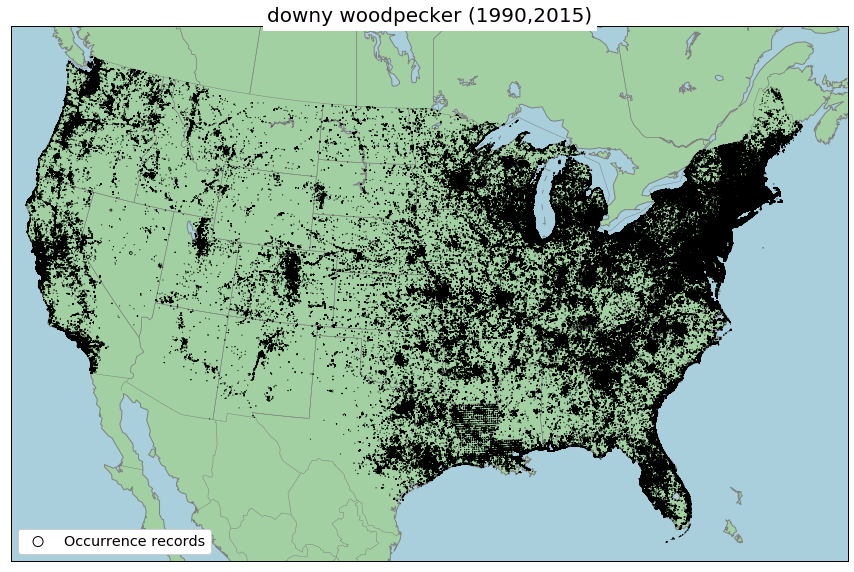

In [18]:
shp1 = {'file': '{0}{1}_polygons'.format(outDir, summary_name), 'column': None,
        'alias': 'Occurrence records', 'drawbounds': True, 'linewidth': .75, 'linecolor': 'k',
        'fillcolor': None, 'marker':'o'}

# Display occurrence polygons
map_these=[shp1]
    
title="{1} ({0})".format(years, common_name)
functions.MapShapefilePolygons(map_these=map_these, title=title)

### Years represented

Text(0.5, 1.0, 'Occurrences per Year')

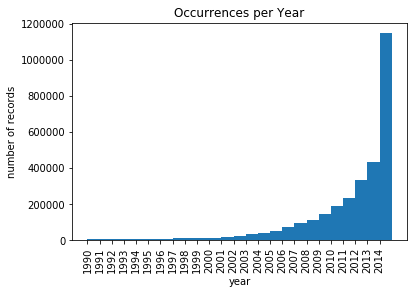

In [19]:
occ_years = [int(x[0]) for x in curs_occ.execute("SELECT strftime('%Y', occurrenceDate) FROM occurrences").fetchall()]
years = connjup.execute("SELECT years_range FROM gbif_requests WHERE request_id = '{0}'".format(gbif_req_id)).fetchone()[0]
years = years.split(',')
yearsrng = list(range(int(years[0]), int(years[1]), 1))
binsnum = int(years[1]) - int(years[0])
plt.hist(occ_years, bins=binsnum)
plt.ylabel("number of records")
plt.xlabel("year")
plt.xticks(yearsrng, rotation=90)
plt.title("Occurrences per Year")

### Months represented

Text(0.5, 1.0, 'Occurrences per Month')

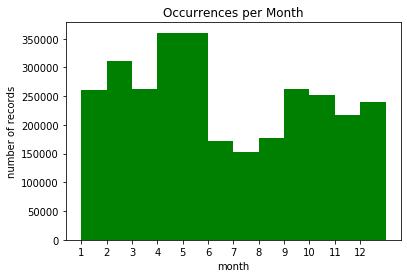

In [20]:
occ_months = [int(x[0]) for x in curs_occ.execute("SELECT strftime('%m', occurrenceDate) FROM occurrences").fetchall()]
plt.hist(occ_months, bins=range(1, 14), color="g")
plt.ylabel("number of records")
plt.xlabel("month")
plt.xticks(range(1, 13))
plt.title("Occurrences per Month")

### Distribution of coordinate uncertainty values

Text(0.5, 1.0, 'Coordinate Uncertainty')

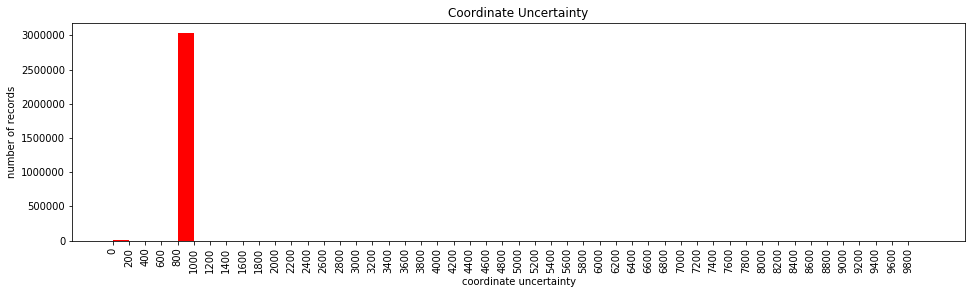

In [21]:
occ_cert = [int(x[0]) for x in curs_occ.execute("SELECT coordinateUncertaintyInMeters FROM occurrences").fetchall()]
maxi = np.max(occ_cert)
plt.figure(figsize=(16,4))
plt.hist(occ_cert, bins=50, color="r")
plt.xticks(range(0, maxi, int(maxi/50)), rotation=90)
plt.ylabel("number of records")
plt.xlabel("coordinate uncertainty")
plt.title("Coordinate Uncertainty")

Text(0.5, 1.0, 'Coordinate Uncertainty - Zoomed In')

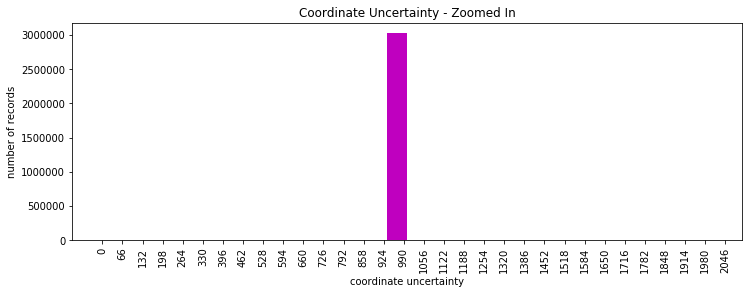

In [22]:
rng_max = 2000
occ_cert2 = [x for x in occ_cert if x <= rng_max]
plt.figure(figsize=(12,4))
plt.hist(occ_cert2, bins=30, color="m", align='mid')
plt.xticks(range(0, rng_max + 100, int(rng_max/30.)), rotation=90)
plt.ylabel("number of records")
plt.xlabel("coordinate uncertainty")
plt.title("Coordinate Uncertainty - Zoomed In")

### Establishment means reported

In [23]:
establishment = curs_occ.execute("SELECT vals FROM unique_values WHERE field = 'establishment' AND step = 'filter';").fetchall()[0]
for est in establishment:
    est = est.replace('[', '').strip().replace(']', '').replace("'", "")
    print(est)

NATIVE, nan


### Identification qualifiers included

In [24]:
quali = curs_occ.execute("SELECT DISTINCT vals FROM unique_values WHERE field = 'IDqualifier' AND step = 'filter';").fetchall()[0]
for q in quali:
    q = q.replace('[', '').strip().replace(']', '').replace("'", "")
    print(q)

A, nan


### Remarks included

In [25]:
remarks = curs_occ.execute("SELECT DISTINCT remarks FROM occurrences;").fetchall()
if len(remarks) <= 20:
    try:
        for rem in remarks:
            if rem[0][0:1] == ';':
                print(rem[0][2:])
            else:
                print(rem[0])
    except:
        pass
else:
    print("More than 20 remarks, consult the occurrence database.")

### Attributes returned for the records in the request (pre-filters)

In [26]:
fields_summary = pd.read_sql("SELECT * FROM gbif_fields_returned", conn_occ)#, index_col='index')
fields_summary.index.name = 'Field'
pd.set_option('display.max_rows', 250)
print(fields_summary)

                                 attribute  included(n)  populated(n)
Field                                                                
0                                 abstract      3029357             0
1                             accessRights      3029357            30
2                            accrualMethod      3029357             0
3                       accrualPeriodicity      3029357             0
4                            accrualPolicy      3029357             0
5                              alternative      3029357             0
6                                 audience      3029357             0
7                                available      3029357             0
8                    bibliographicCitation      3029357           629
9                               conformsTo      3029357             0
10                             contributor      3029357             0
11                                coverage      3029357             0
12                  

### Runtime

In [27]:
t2 = datetime.now()
print(t2 - t1)

1:56:00.078592
